<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Summary-Stats-and-Diagnostics" data-toc-modified-id="Summary-Stats-and-Diagnostics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary Stats and Diagnostics</a></span></li><li><span><a href="#Seasonality,-Trend-and-Noise" data-toc-modified-id="Seasonality,-Trend-and-Noise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seasonality, Trend and Noise</a></span></li><li><span><a href="#Work-with-Multiple-Time-Series" data-toc-modified-id="Work-with-Multiple-Time-Series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Work with Multiple Time Series</a></span></li><li><span><a href="#Case-Study" data-toc-modified-id="Case-Study-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Case Study</a></span></li></ul></div>

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from statsmodels.graphics import tsaplots
import statsmodels.api as sm

In [310]:
df1= pd.read_csv('https://assets.datacamp.com/production/course_5226/datasets/ch1_discoveries.csv')
df2 = pd.read_csv('https://assets.datacamp.com/production/course_5226/datasets/ch2_co2_levels.csv')
df3 = pd.read_csv('https://assets.datacamp.com/production/course_5226/datasets/ch3_airline_passengers.csv')
df4 = pd.read_csv('https://assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv')
df5 = pd.read_csv('https://assets.datacamp.com/production/course_5226/datasets/ch5_employment.csv')

# Introduction

* basic plottings tools
* annotate and personalize time series plots

In [6]:
#plt.style.available
plt.style.use('fivethirtyeight')

In [8]:
df1.head()

,date,Y
0,01-01-1860,5
1,01-01-1861,3
2,01-01-1862,0
3,01-01-1863,2
4,01-01-1864,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
date    100 non-null object
Y       100 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
df1['date']= pd.to_datetime(df1['date'])
df1.dtypes

date    datetime64[ns]
Y                int64
dtype: object

Text(0.5,1,'no. of discoveries over years')

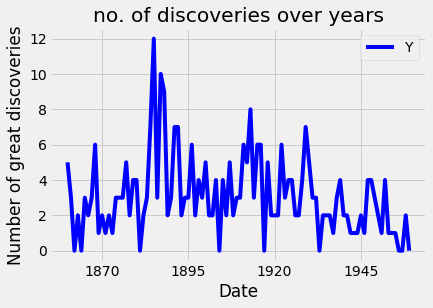

In [15]:
df1 = df1.set_index('date')
ax = df1.plot(color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')
ax.set_title('no. of discoveries over years')

It looks like the largest number of great discoveries happened during the year of 1885.

Text(0.5,1,'Number of great inventions and scientific discoveries from 1860 to 1959')

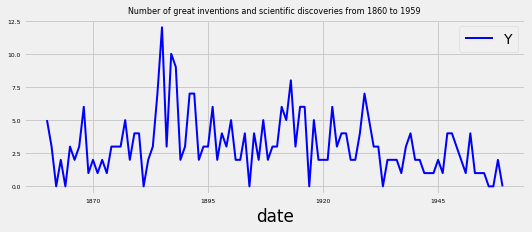

In [16]:
ax = df1.plot(color='blue',figsize=(8,3),linewidth=2,fontsize=6)
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

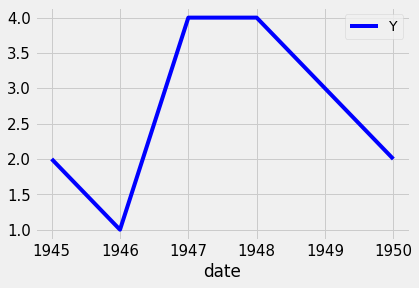

In [17]:
df1_subset_1= df1['1945':'1950']
ax = df1_subset_1.plot(color='blue',fontsize=15)

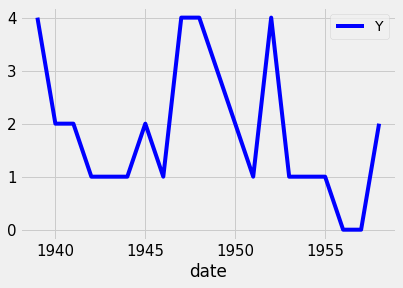

In [19]:
df1_subset_2 = df1['1939':'1958']
ax = df1_subset_2.plot(color='blue', fontsize=15)

It looks like there were no great discoveries in 1956 and 1957!

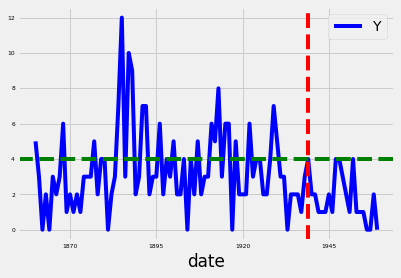

In [20]:
ax = df1.plot(color='blue', fontsize=6)
ax.axvline('1939-01-01', color='red', linestyle='--')
ax.axhline(4, color='green', linestyle='--')

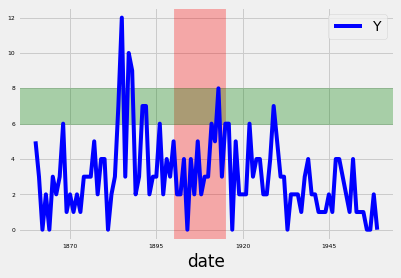

In [21]:
ax = df1.plot(color='blue', fontsize=6)
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)
ax.axhspan(6, 8, color='green', alpha=0.3)

# Summary Stats and Diagnostics

In [22]:
df2.head()

,datestamp,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
datestamp    2284 non-null object
co2          2225 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.8+ KB


In [285]:
#set the datestamp col as index so its easier to extract date, month, day
# as well for time-series plot
df2.set_index('datestamp')

#find missing values
df2.isnull().sum()

datestamp     0
co2          59
dtype: int64

In [286]:
#Handle missing values:bfill (i.e backfilling- next valid observation)
#ffill (i.e forward-filling- last valid observation)
df2= df2.fillna(method='bfill')
df2.isnull().sum()


datestamp    0
co2          0
dtype: int64

Text(0.5,1,'Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001')

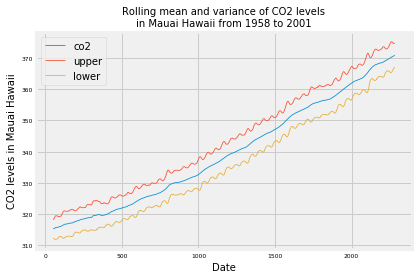

In [287]:
#display rolling averages- 52 weeks
ma = df2.rolling(window=52).mean()
mstd = df2.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])
# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

ax1 = ma.plot(linewidth=0.8,fontsize=6)
ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('CO2 levels in Mauai Hawaii',fontsize=10)
ax1.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)

Text(0.5,1,'Rolling SD and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001')

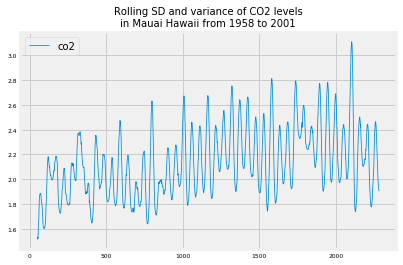

In [288]:
ax2= mstd.plot(linewidth=0.8,fontsize=6)
ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('CO2 levels in Mauai Hawaii',fontsize=10)
ax2.set_title('Rolling SD and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)

In [291]:
#aggregate
df2['datestamp'] = pd.to_datetime(df2.index)
df2.reset_index(drop=True);

Text(0,0.5,'CO2 levels')

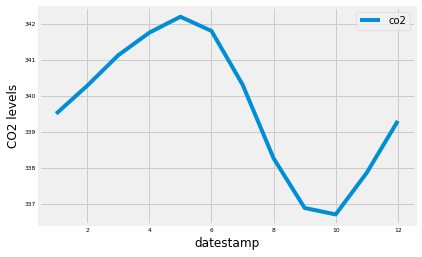

In [292]:
df2= df2.set_index('datestamp')
month = df2.index.month
mean_co2levels_month = df2.groupby(month).mean()
mean_co2levels_month.plot(fontsize=6)
plt.legend(fontsize=10)
plt.ylabel('CO2 levels')

By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!

No handles with labels found to put in legend.


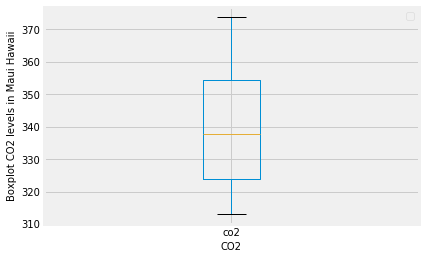

In [293]:
# Generate a boxplot and hist
ax = df2.boxplot()
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)

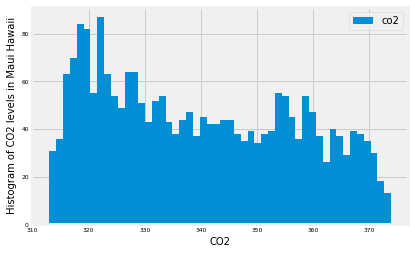

In [294]:
ax = df2.plot(kind='hist',bins=50,fontsize=6)
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)

Text(0,0.5,'Density plot of CO2 levels in Maui Hawaii')

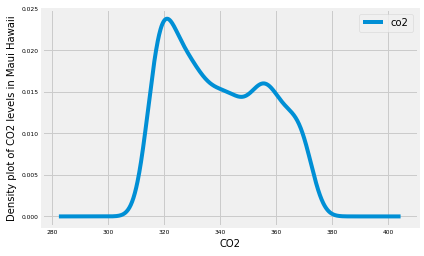

In [295]:
ax = df2.plot(kind='density', linewidth=4, fontsize=6)
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

# Seasonality, Trend and Noise

* learn about autocorrelation- refers to the correlation of a time series with a lagged version of itself. 
* learn about partial autocorrelation-the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points.
* automatically detect seasonality, trend and noise in the time-series data- these are time series decomposition and are the properties of time-series analysis.

-> seasonality- periodic data
-> trend upwards or downwards slope
-> outlier or missing values or inconsistent values

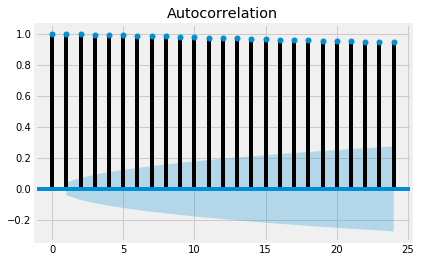

In [296]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(df2.co2,lags=24)

Autocorrelation plots can be used to quickly discover patterns into your time series, so let's delve a little bit deeper into that!

the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

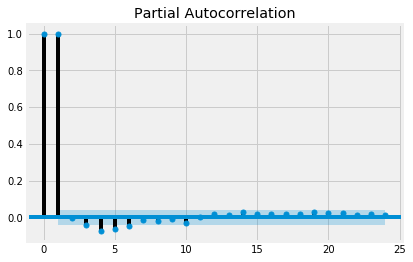

In [297]:
fig = tsaplots.plot_pacf(df2.co2, lags=24)

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

In [88]:
#time series decompostion
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df2)
decomposition.seasonal

,co2
datestamp,
1958-03-29,1.028042
1958-04-05,1.235242
1958-04-12,1.412344
1958-04-19,1.701186
1958-04-26,1.950694
1958-05-03,2.032939
1958-05-10,2.445506
1958-05-17,2.535041
1958-05-24,2.662031


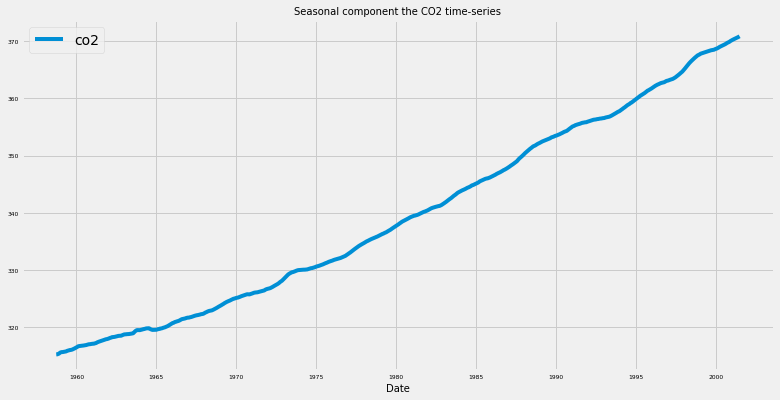

In [89]:
#plot individual components
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [100]:
#applying chapt 1+2 on a new dataset
df3.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [94]:
df3.describe()

,AirPassengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Text(0.5,1,'Number of Monthly Airline Passengers')

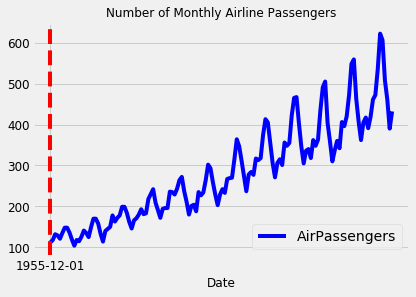

In [101]:
#visualize
ax = df3.plot(color='blue',fontsize=12)
ax.axvline('1955-12-01',color='red',linestyle='--')
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)

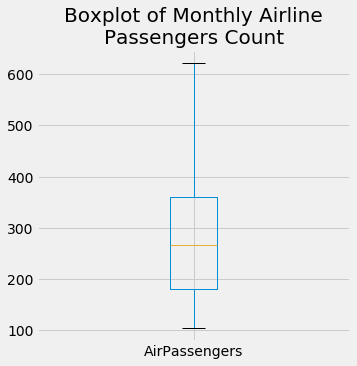

In [135]:
# analyze
ax = df3.boxplot(figsize=(5,5))
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

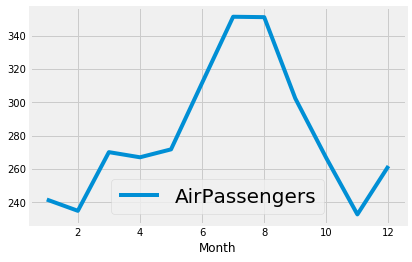

In [299]:
df3['Month'] = pd.to_datetime(df3['Month'])
df3 = df3.set_index('Month')
# Get month for each dates from the index of airline
index_month = df3.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = df3.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)

Looks like July and August are the busiest months!

In [300]:
#decomposition
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(df3)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

airline_decomposition = pd.concat([trend, seasonal],axis=1)
airline_decomposition.columns= ['trend','seasonal']
airline_decomposition.head()


,trend,seasonal
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313


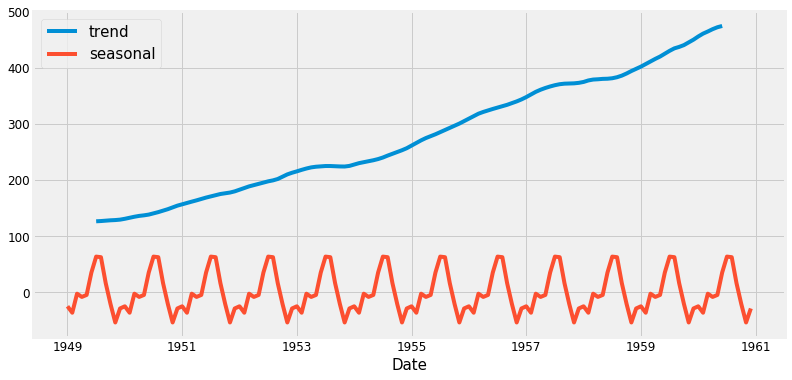

In [301]:
ax = airline_decomposition.plot(figsize=(12,6),fontsize=12)
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)

# Work with Multiple Time Series

* multiple time series plots 
* relationship between multiple time series 

In [138]:
df4.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [146]:
df4['date'] = pd.to_datetime(df4.date)
df4 = df4.set_index('date');

In [147]:
df4.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


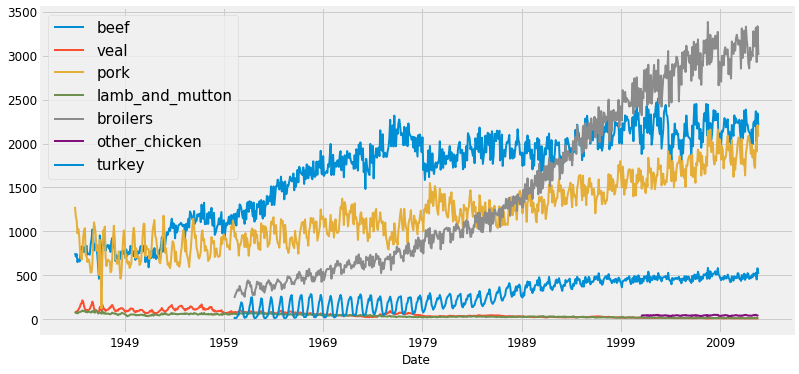

In [149]:
ax = df4.plot(linewidth=2,fontsize=12,figsize=(12,6))
ax.set_xlabel('Date')
ax.legend(fontsize=15)

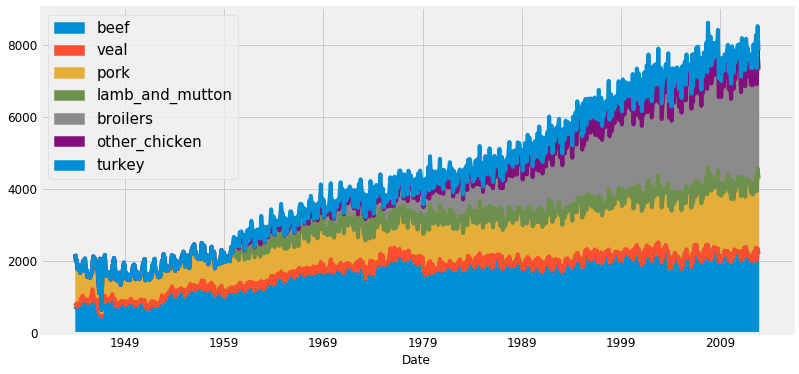

In [151]:
ax = df4.plot.area(fontsize=12,figsize=(12,6))
ax.set_xlabel('Date')
ax.legend(fontsize=15);

It looks the time series in the meat DataFrame have very different growth rates!

In [173]:
mean_meat = df4.mean()
mean_meat = pd.DataFrame(mean_meat)
mean_meat.columns = ['Mean']
mean_meat

,Mean
beef,1683.463362
veal,54.198549
pork,1211.683797
lamb_and_mutton,38.360701
broilers,1516.582520
other_chicken,43.033566
turkey,292.814646


In [154]:
df4.max()

beef               2512.0
veal                215.0
pork               2210.4
lamb_and_mutton     109.0
broilers           3383.8
other_chicken        51.1
turkey              585.1
dtype: float64

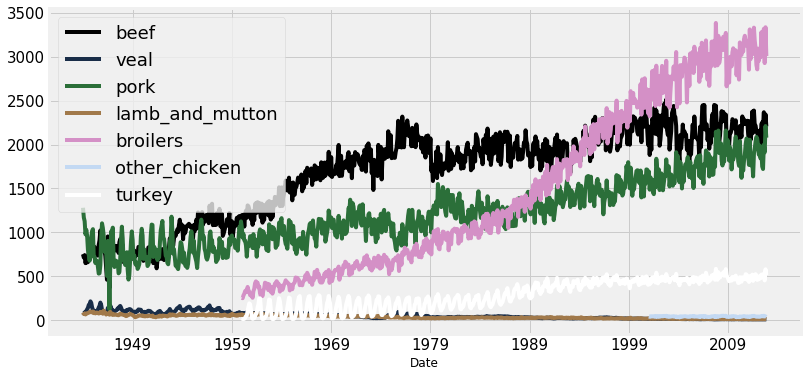

In [156]:
# color palette 
# Plot time series dataset using the cubehelix color palette
ax = df4.plot(colormap='cubehelix', fontsize=15,figsize=(12,6))
ax.set_xlabel('Date')
ax.legend(fontsize=18)


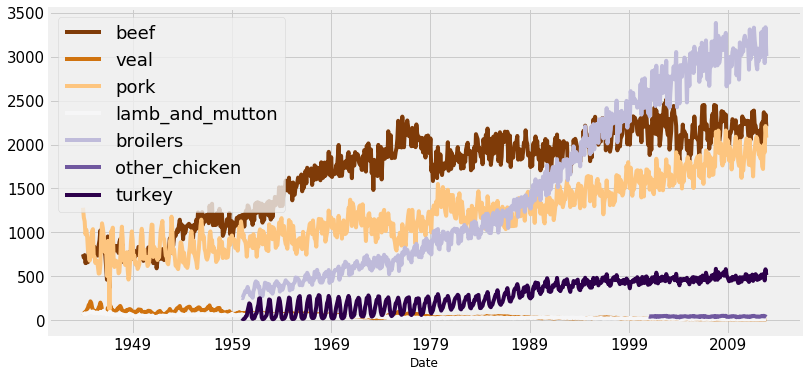

In [158]:
# Plot time series dataset using the PuOr color palette
ax = df4.plot(colormap='PuOr', fontsize=15,figsize=(12,6))
ax.set_xlabel('Date')
ax.legend(fontsize=18)

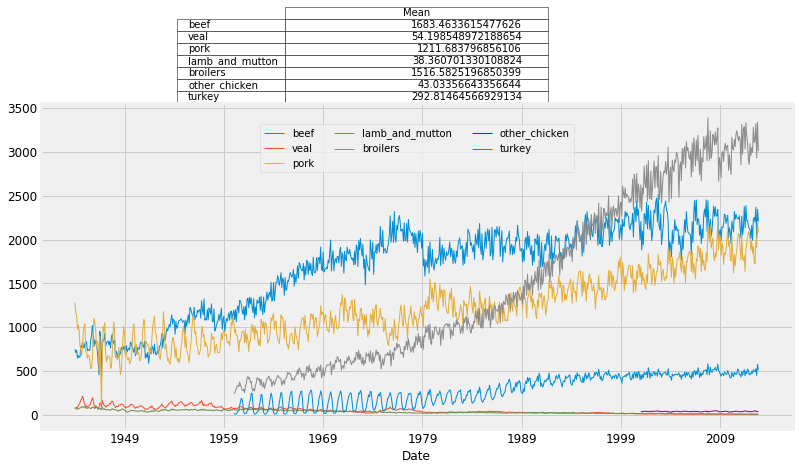

In [182]:
#Add summary statistics to your time series plot
ax = df4.plot(fontsize=12,linewidth=1,figsize=(12,6))
ax.set_xlabel('Date',fontsize=12)
ax.table(cellText= mean_meat.values, 
         colWidths = [0.35]*len(mean_meat.columns),
         rowLabels=mean_meat.index,
         colLabels=mean_meat.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=10)



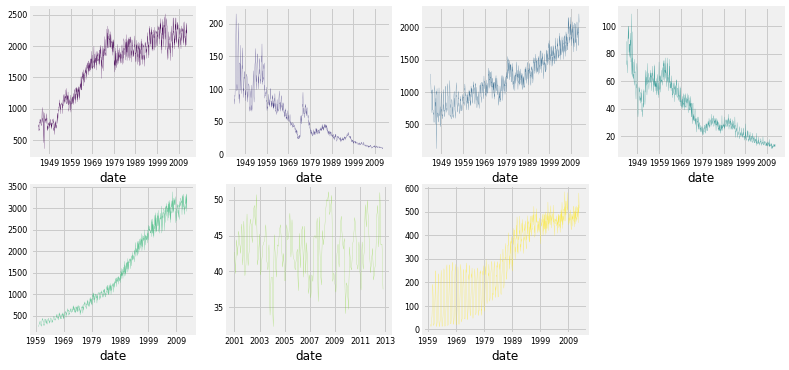

In [188]:
# Plot your time series on individual plots
# Create a facetted graph with 2 rows and 4 columns
df4.plot(subplots=True,
         layout=(2, 4),
         sharex=False,
         sharey=False,
         colormap='viridis',
         fontsize=8,
         legend=False,
         linewidth=0.2,
         figsize=(12, 6));

Correlation coefficients can be computed with the pearson, kendall and spearman methods. The pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587
            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


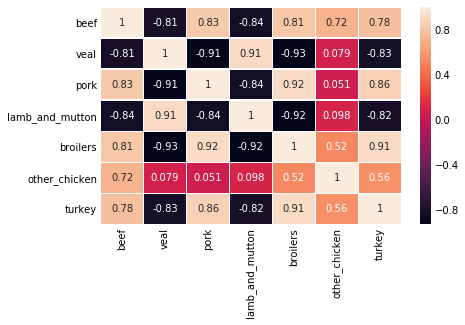

In [197]:
#Compute correlations between time series
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

# Print the correlation matrix between the beef and pork columns using the spearman method
print(df4[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

# Print the correlation matrix between the pork, veal and turkey columns using the pearson method
print(df4[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

# visualize correlation matrices
# get correlation matrix of the meat dataframe
corr_meat = df4.corr(method='spearman')
#heatmap
sns.heatmap(corr_meat,annot=True,linewidths=0.4, annot_kws={'size':10});
plt.xticks(rotation=90);
plt.yticks(rotation=0);

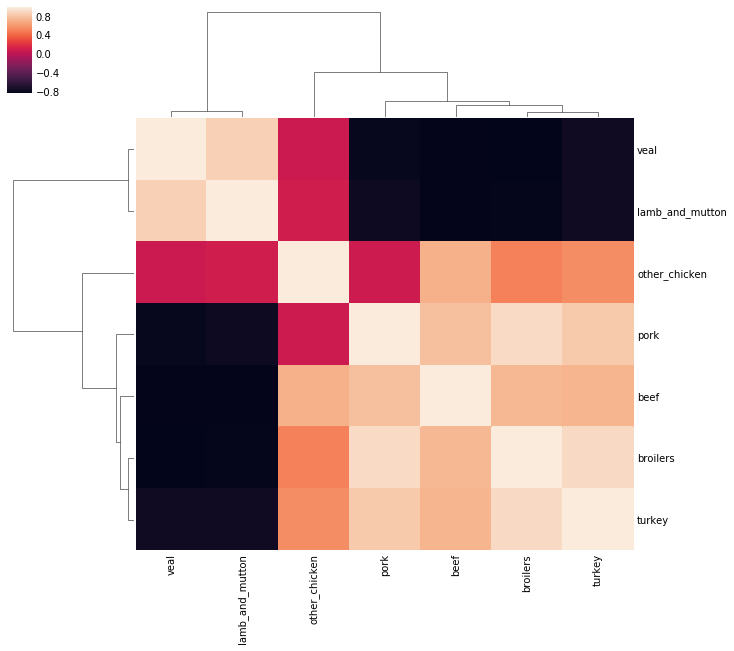

In [200]:
# clustered heatmaps- more informative than heatmaps
corr_meat = df4.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10));

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);

# Case Study

* Apply chapt 1-4 tools to a new dataframe

In [214]:
df5.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


In [217]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
datestamp                         122 non-null object
Agriculture                       122 non-null float64
Business services                 122 non-null float64
Construction                      122 non-null float64
Durable goods manufacturing       122 non-null float64
Education and Health              122 non-null float64
Finance                           122 non-null float64
Government                        122 non-null float64
Information                       122 non-null float64
Leisure and hospitality           122 non-null float64
Manufacturing                     122 non-null float64
Mining and Extraction             122 non-null float64
Nondurable goods manufacturing    122 non-null float64
Other                             122 non-null float64
Self-employed                     122 non-null float64
Transportation and Utilities      122 non-null float64
Wholesale and Re

In [311]:
# exploration
df5['datestamp'] = pd.to_datetime(df5.datestamp)
df5.set_index('datestamp', inplace=True);

Agriculture                       9.840984
Business services                 6.919672
Construction                      9.426230
Durable goods manufacturing       6.025410
Education and Health              3.420492
Finance                           3.540164
Government                        2.581148
Information                       5.486885
Leisure and hospitality           8.315574
Manufacturing                     5.982787
Mining and Extraction             5.088525
Nondurable goods manufacturing    5.930328
Other                             5.096721
Self-employed                     3.031967
Transportation and Utilities      4.935246
Wholesale and Retail Trade        5.766393
dtype: float64

 Agriculture                       21.3
Business services                 12.0
Construction                      27.1
Durable goods manufacturing       14.1
Education and Health               6.1
Finance                            7.5
Government                         5.1
Information           

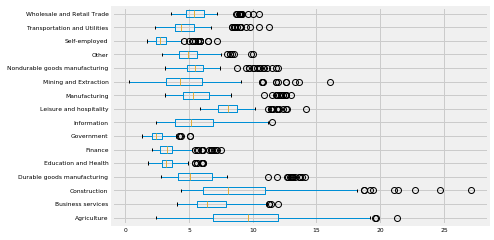

In [312]:
# describe
df5.boxplot(fontsize=6,vert=False);
print(df5.mean())
print('\n',df5.max())

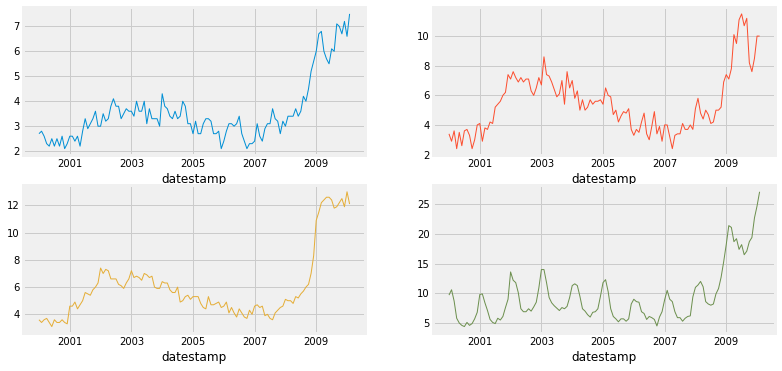

In [313]:
#plot 
jobs_subset = df5[['Finance', 'Information', 'Manufacturing', 'Construction']]

ax = jobs_subset.plot(subplots=True, layout=(2,2), sharex=False,
                     sharey=False, linewidth=1, fontsize=10,
                     legend=False,figsize=(12,6))

This is very interesting! The plots really show that there was a drastic increase in unemployment rate during in 2001 and 2008!

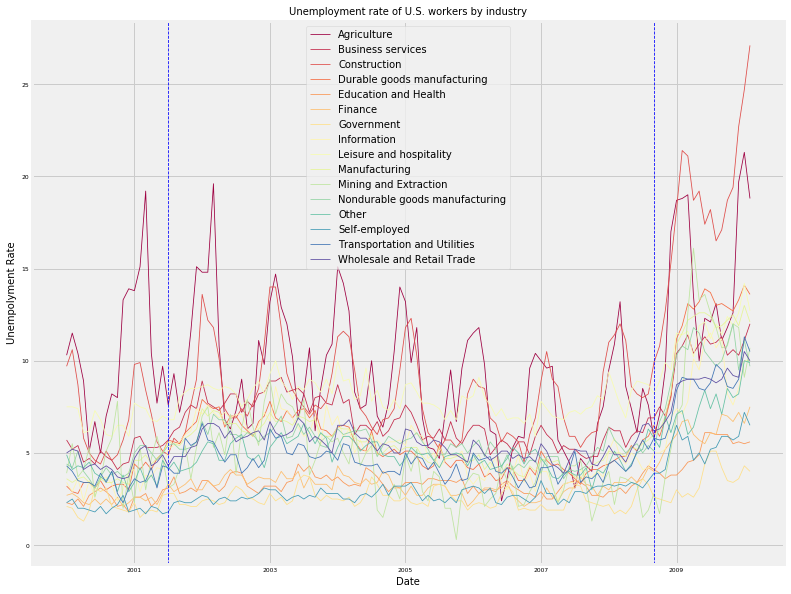

In [314]:
# annotate significant events
ax = df5.plot(colormap='Spectral',fontsize=6, linewidth=0.8,figsize=(12,10))
ax.set_xlabel('Date',fontsize=10)
ax.set_ylabel('Unempolyment Rate',fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry',fontsize=10)
ax.legend(loc= 'upper center')
ax.axvline('2001-07-01',color='blue',linewidth=0.8,linestyle='--',alpha=1)
ax.axvline('2008-09-01',color='blue',linewidth=0.8,linestyle='--',alpha=1)


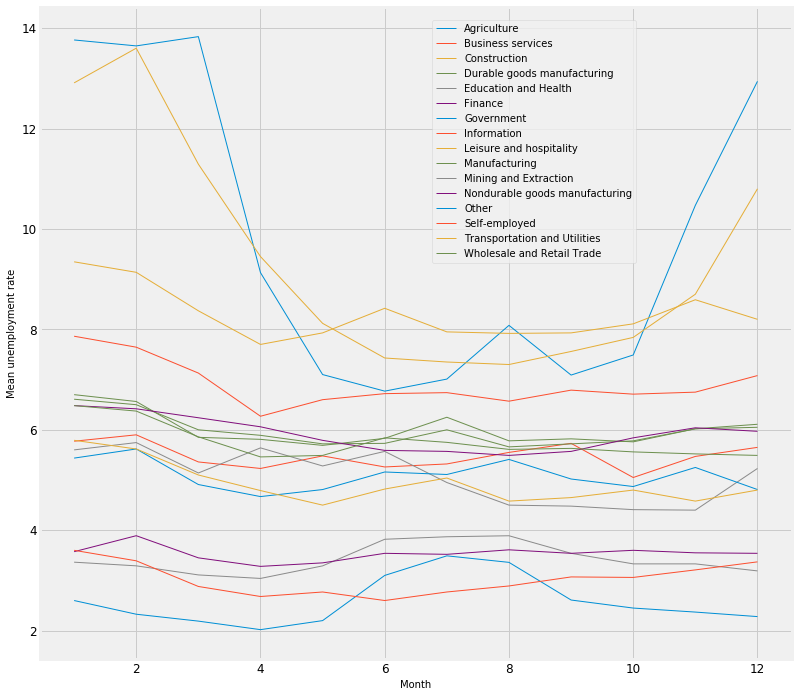

In [315]:
#Plot monthly and yearly trends
index_month = df5.index.month
jobs_by_month = df5.groupby(index_month).mean()
ax = jobs_by_month.plot(fontsize=12, linewidth=1,figsize=(12,12))

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)


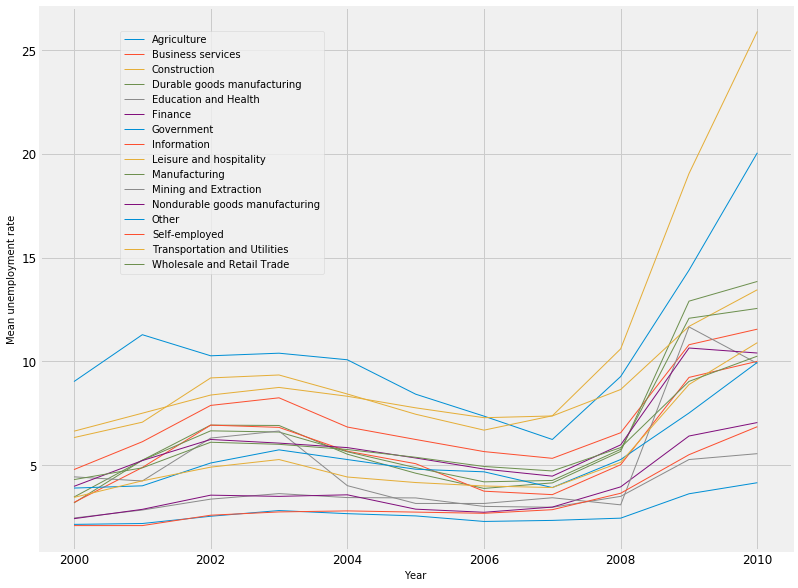

In [316]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = df5.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = df5.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=12, linewidth=1,figsize=(12,10))

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)

Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

In [317]:
# Apply time series decomposition to your dataset
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = df5.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(df5[ts])
    jobs_decomp[ts] = ts_decomposition

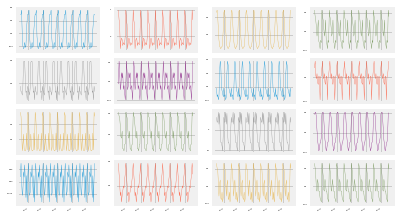

In [319]:
#Visualize the seasonality of multiple time series
#empty dict
jobs_seasonal= {}
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionnary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)


Wow! Each time series in the jobs DataFrame have very different seasonality patterns!

0.89


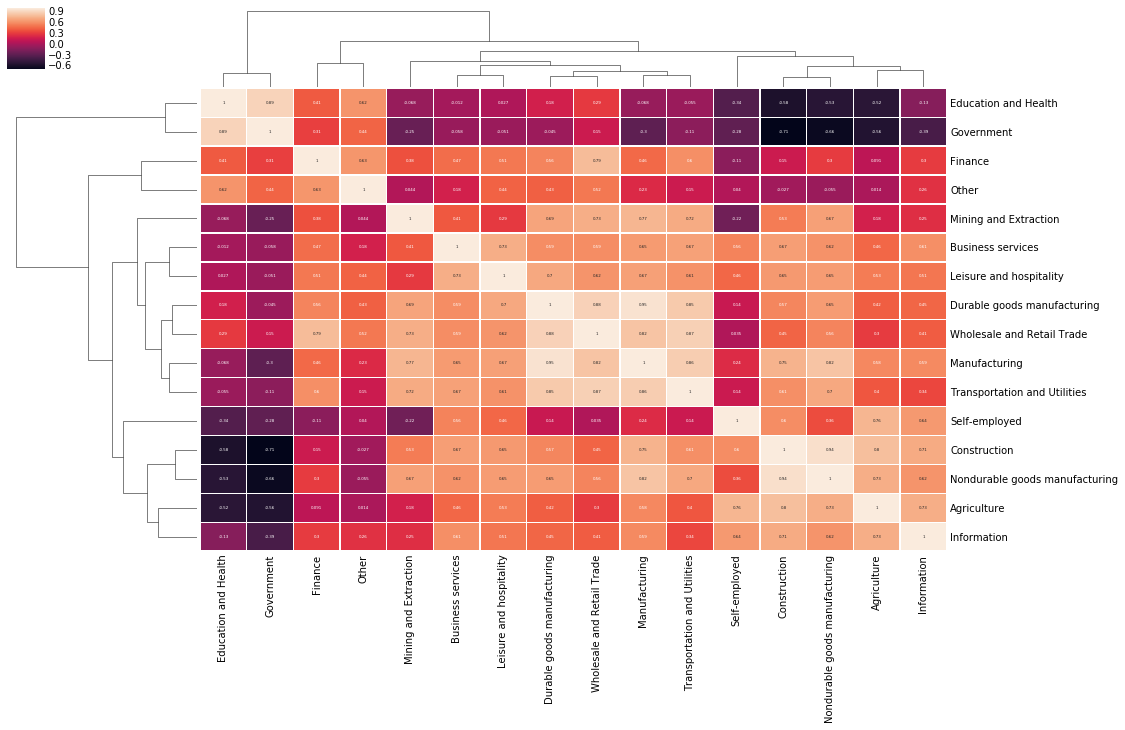

In [330]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10));
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)

In [329]:
seasonality_corr[['Government','Education and Health']].corr(method=('spearman'))

,Government,Education and Health
Government,1.000000,0.982353
Education and Health,0.982353,1.000000
